In [134]:
import math
frequency=250
sampling_rate=1000   # to get exact representatiion in FFT, keep sampling_rate=Num_Samples as in https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/
num_samples=1000
frame=[math.sin(2*math.pi*frequency*t/sampling_rate) for t in range(0,num_samples)]

In [135]:
time   = np.arange(0, 65, .25);

 

# Get sample points for the discrete signal(which represents a continous signal)

frame1   = np.sin(time)

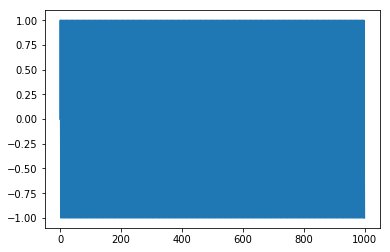

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(frame)

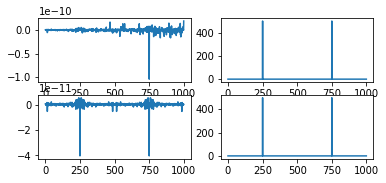

In [137]:
import cmath
N=len(frame)
DFT=[]
for k in range(0,N):
    s=0.0
    for t in range(0,N):
        s+=frame[t]*cmath.exp(-2*1j*cmath.pi*k*t/N)
    DFT.append(s)
plt.subplot(3,2,1)
plt.plot(DFT)  

plt.subplot(3,2,2)
freqs=np.abs(DFT)
plt.plot(freqs)


#FFT using numpy and to compare the results
npDFT=np.fft.fft(frame)
npFreq=np.abs(npDFT)

plt.subplot(3,2,3)
plt.plot(npDFT)  

plt.subplot(3,2,4)

plt.plot(npFreq)

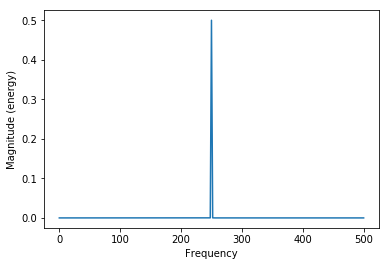

In [143]:
plt.magnitude_spectrum(frame,Fs=1000)    # As in https://pythontic.com/visualization/signals/magnitude%20spectrum
plt.show()

In [158]:
def frames_to_magspec(frames):
    # compute the fft
    # compute magnitude
    magspec = []
    for i in range(0,frames.shape[1]):
        frame=frames[:,i]
        N=len(frame)
        DFT=[]
        for k in range(0,N):
            s=0.0
            for t in range(0,N):
                s+=frame[t]*cmath.exp(-2*1j*cmath.pi*k*t/N)
            DFT.append(abs(s))    
        magspec.append(DFT)     #   DFT[0:int(N/2+1)]) for upper half only
    return magspec

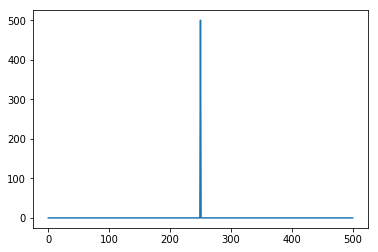

In [159]:
frames=np.zeros([len(frame),1])
frames[:,0]=frame
plt.plot(frames_to_magspec(frames)[0])    #same as plot.magnitude_spectrum() but with upper and lower halves

In [ ]:
def InverseDFT(FmList):
    N = len(FmList)
    fnList = []
    for n in range(N):
        fn = 0.0
        for m in range(N):
            fn += FmList[m] * cmath.exp(1j * pi2 * m * n / N)
        fnList.append(fn)
    return fnList

def DFT(fnList):
    N = len(fnList)
    FmList = []
    for m in range(N):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(- 1j * pi2 * m * n / N)
        FmList.append(Fm / N)
    return FmList

In [167]:
'''
Steps to convert magnitude spectrum into MFCC features:

Get power spectrum: |DFT|^2
Compute a triangular bank filter to transform hz scale into mel scale
Get log spectrum
Apply discrete cossine transform

'''


'\nSteps to convert magnitude spectrum into MFCC features:\n\nGet power spectrum: |DFT|^2\nCompute a triangular bank filter to transform hz scale into mel scale\nGet log spectrum\nApply discrete cossine transform\n\n'

In [168]:
# based on https://code.soundsoftware.ac.uk/projects/vampy/repository/revisions/d56f48aafb99/entry/Example%20VamPy%20plugins/PyMFCC.py
powerSpectrum = abs(DFT) ** 2
filteredSpectrum = np.dot(powerSpectrum, self.make_mel_filterbank())
logSpectrum = np.log(filteredSpectrum)
dctSpectrum = dct(logSpectrum, type=2)  # MFCC :)

TypeError: bad operand type for abs(): 'list'

In [9]:
f=[1,2,3,4,5,6,7]
np.transpose(np.array(f)).shape

(7,)

In [13]:
f=np.array(f).reshape(len(f),1)
f.shape

(7, 1)

In [14]:
np.transpose(np.array(f)).shape

(1, 7)